# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

# Question 1

**Firstly, we have defined all the variables and equations given in the assignment.**


In [3]:
import numpy as np
import matplotlib.pyplot as plt

#preferences
alpha = 1/3
beta = 2/3

#endowment
omega1A = 0.8
omega2A = 0.3

def omega1B(omega1A):
    return 1 - omega1A

def omega2B(omega2A):
    return 1 - omega2A

#utility functions
def utility_A(x1A, x2A, alpha):
    return x1A**alpha * x2A**(1-alpha)

def utility_B(x1B, x2B, beta):
    return x1B**beta * x2B**(1-beta)

#demand functions
def x1A(p1, p2, omega1A, omega2A):
    return alpha * ((p1 * omega1A + p2 * omega2A)/p1)

def x2A(p1, p2, omega1A, omega2A):
    return (1-alpha)*((p1 * omega1A + p2 * omega2A)/p2)

def x1B(p1, p2, omega1B, omega2B):
    return beta*((p1*omega1B + p2*omega2B)/p1)

def x2B(p1, p2, omega1B, omega2B):
    return (1-beta)*((p1 * omega1B + p2 * omega2B)/p2)

#market clearing
def check_market_clearing1(alpha, p1, p2, omega1A, omega1B):
    return x1A(p1, p2, omega1A, omega2A) + x1B(p1, p2, omega1B, omega2B) == omega1A + omega1B
def check_market_clearing2(beta, p1, p2, omega2A, omega2B):
    return x2A(p1, p2, omega1A, omega2A) + x2B(p1, p2, omega1B, omega2B) == omega2A + omega2B

def eps1(p1, p2, x1A, omega1A, x1B, omega1B):
    return x1A(p1, p2, omega1A, omega2A) - omega1A + x1B(p1, p2, omega1B, omega2B) - omega1B
def eps2(p1,p2, x2A, omega2A, x2B, omega2B):
    return x2A(p1, p2, omega1A, omega2A) - omega2A + x2B(p1, p2, omega1B, omega2B) - omega2B
  

**In this code we have presented the indifference curves in the Edgeworth box and the area, where both of the consumers can improve their utility.**

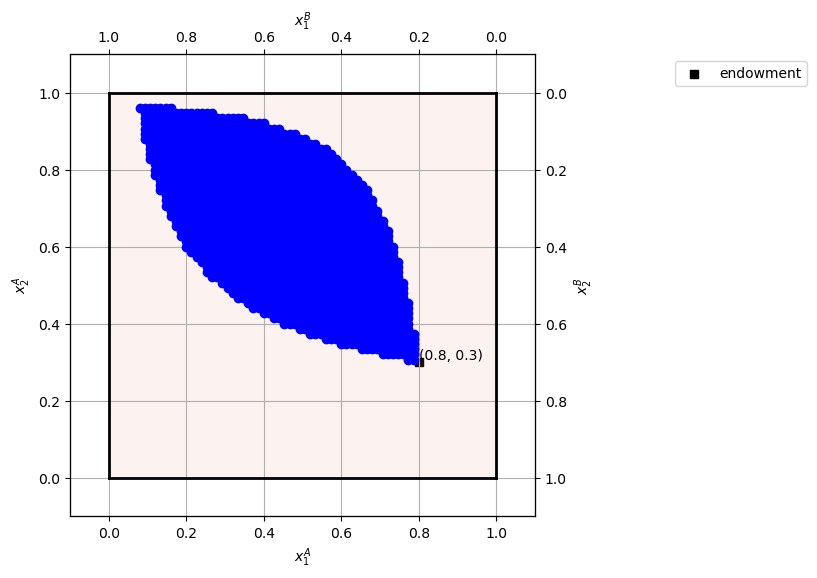

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# a. total endowment
omega1bar = 1.0
omega2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

#endowment
omega1A = 0.8
omega2A = 0.3

# A
ax_A.scatter(omega1A,omega2A,marker='s',color='black',label='endowment')
ax_A.text(omega1A, omega2A, f'({omega1A}, {omega2A})', verticalalignment='bottom')

# Defining range for xA1 and xA2
N = 75
x1A_range = np.linspace(0, 1, N+1)
x2A_range = np.linspace(0, 1, N+1)

# Finding combinations that satisfy the conditions
satisfying_combinations = []
for x1A in x1A_range:
    for x2A in x2A_range:
        if utility_A(x1A, x2A, alpha) >= utility_A(omega1A, omega2A, alpha) and utility_B(1 - x1A, 1 - x2A, beta) >= utility_B(1 - omega1A, 1 - omega2A, beta):
            satisfying_combinations.append((1 - x1A, 1 - x2A)) # Convert to B's coordinates

# Extracting x1B and x2B for plotting
x1B_values, x2B_values = zip(*satisfying_combinations)

# Plot satisfying combinations
ax_B.scatter(x1B_values, x2B_values, marker='o', color = 'blue', label='Satisfying Combinations')

# limits
ax_A.plot([0,omega1bar],[0,0],lw=2,color='black')
ax_A.plot([0,omega1bar],[omega2bar,omega2bar],lw=2,color='black')
ax_A.plot([0,0],[0,omega2bar],lw=2,color='black')
ax_A.plot([omega1bar,omega1bar],[0,omega2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, omega1bar + 0.1])
ax_A.set_ylim([-0.1, omega2bar + 0.1])    
ax_B.set_xlim([omega1bar + 0.1, -0.1])
ax_B.set_ylim([omega2bar + 0.1, -0.1])

# Mesh
x = np.linspace(0, omega1bar, 10)
y = np.linspace(0, omega2bar, 10)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

ax_A.contourf(X, Y, Z, 20, cmap='RdGy', alpha=0.1)

# Scale
ax_A.set_xticks(np.arange(0, omega1bar+0.1, 0.2))
ax_A.set_yticks(np.arange(0, omega2bar+0.1, 0.2))
ax_B.set_xticks(np.arange(0, omega1bar+0.1, 0.2))
ax_B.set_yticks(np.arange(0, omega2bar+0.1, 0.2))

ax_A.grid(True)

ax_A.set_xlim([-0.1, omega1bar + 0.1])
ax_A.set_ylim([-0.1, omega2bar + 0.1])    
ax_B.set_xlim([omega1bar + 0.1, -0.1])
ax_B.set_ylim([omega2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()

# Question 2

**We calculated the error in the market clearing price condition s.**

In [65]:
# Parameters
alpha = 1/3
beta = 2/3
w1A = 0.8
w2A = 0.3
p2 = 1

import numpy as np

P1 = np.linspace(0.5, 2.5, 75)  # P1 price range

def demand_A(p1, w1A=w1A, w2A=w2A, alpha=alpha, p2=p2):
    budget = w1A * p1 + w2A * p2
    x1A_star = alpha * budget / p1
    x2A_star = (1 - alpha) * budget / p2
    return x1A_star, x2A_star

def demand_B(p1, w1A=w1A, w2A=w2A, beta=beta, p2=p2):
    w1B = 1 - w1A
    w2B = 1 - w2A
    budget = w1B * p1 + w2B * p2
    x1B_star = beta * budget / p1
    x2B_star = (1 - beta) * budget / p2
    return x1B_star, x2B_star

errors = []
for p1 in P1:
    x1A, x2A = demand_A(p1)
    x1B, x2B = demand_B(p1)
    eps1 = x1A + x1B - 1  # Market clearing error for good 1
    eps2 = x2A + x2B - 1  # Market clearing error for good 2
    errors.append((eps1, eps2))

abs_errors = [abs(eps1) + abs(eps2) for eps1, eps2 in errors]
min_error_index = np.argmin(abs_errors)
best_p1 = P1[min_error_index]

print(best_p1, abs_errors[min_error_index])


0.9324324324324325 0.014936675806240807


# Question 3

**In this task we are calculating the market clearing price, knowing that p2 is equal to 1. We are optimizing customer A's utility function and finding his optimal consumption of both goods. From the optimal consumpion of customer A, we find the market clearing price.**

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Total endowment
omega1A = 0.8
omega2A = 0.3
omega1B = 1 - omega1A
omega2B = 1 - omega2A

# Parameters
alpha = 1/3 
beta = 2/3 
p2 = 1
market_clearing_price_x2 = p2

# Defining utility functions
def utility_A(x1A, x2A):
    return x1A**alpha * x2A**(1-alpha)

def utility_B(x1B, x2B):
    return x1B**beta * x2B**(1-beta)

# Defining A's budget constraint
def budget_constraint_A(x, p1):
    x1A, x2A = x
    return omega1A * p1 - (p1 * x1A + x2A)

# Defining A's objective function
def objective_A(x):
    x1A, x2A = x
    return -utility_A(x1A, x2A)

# Initial guess for A's consumption
initial_guess_A = [0.5, 0.5]

# Optimization problem for A
result_A = minimize(objective_A, initial_guess_A, constraints={'type': 'eq', 'fun': budget_constraint_A, 'args': (1,)}, bounds=[(0, None), (0, None)])

# Extracting optimal consumption for A
x1A_optimal, x2A_optimal = result_A.x
print("Optimal consumption for A (xA1, xA2):", (x1A_optimal, x2A_optimal))

# Calculating B's consumption
x1B_optimal = omega1B - x1A_optimal
x2B_optimal = omega2B - x2A_optimal
x1B_optimal = max(0, x1B_optimal) # Ensure B's consumption is non-negative
x2B_optimal = max(0, x2B_optimal) # Ensure B's consumption is non-negative

# Calculating total demand for each good
total_demand_x1 = x1A_optimal + x1B_optimal
total_demand_x2 = x2A_optimal + x2B_optimal

# Calculating market clearing price for x1
market_clearing_price_x1 = omega1A / total_demand_x1
print("Market clearing price for x1:", market_clearing_price_x1)
print("Market clearing price for x2:", market_clearing_price_x2)


Optimal consumption for A (xA1, xA2): (0.26692358585244436, 0.5330764141475557)
Market clearing price for x1: 2.9971124411697394
Market clearing price for x2: 1


We suspect that there could be a problem with our code as customer B does not have a consumption.

# Question 4

**Part A:** finding the allocation of consumption if price 1 (p1) belongs to set P1 and consumer A is chosing the price to maximize their own utility functions

In [41]:
import numpy as np
from scipy.optimize import minimize

# Total endowment
omega1A = 0.8
omega2A = 0.3
omega1B = 1 - omega1A
omega2B = 1 - omega2A

# Parameters
alpha = 1/3 
beta = 2/3 

# Defining utility function for consumer A
def u_A(x1, x2):
    return x1**alpha * x2**(1-alpha)

# Defining the objective function to maximize for consumer A
def objective_A(p1):
    # Calculating xB1 and xB2 based on p1
    xB1 = omega1B - (omega1A * p1) / p1
    xB2 = omega2B - (omega2A * p1) / p1
    # Ensuring non-negative consumption for B
    xB1 = max(0, xB1)
    xB2 = max(0, xB2)
    # Calculating the utility for consumer A
    utility = u_A(1 - xB1, 1 - xB2)
    return -utility # We want to maximize utility, so return negative of utility

# Defining the penalty function for the constraint p1 in P1
def penalty_function(p1):
    if p1 < 0.5 or p1 > 2.5:
        return 1e6 # Penalty factor for violating constraint
    else:
        return 0

# Defining the total objective function (negative utility + penalty)
def total_objective_A(p1):
    return objective_A(p1) + penalty_function(p1)

# Finding the optimal p1 using penalty approach
result = minimize(total_objective_A, x0=1, bounds=[(0.5, 2.5)])

# Extracting the optimal p1
optimal_p1 = result.x[0]

# Calculating xB1 and xB2 based on the optimal p1
xB1 = omega1B - (omega1A * optimal_p1) / optimal_p1
xB2 = omega2B - (omega2A * optimal_p1) / optimal_p1

# Ensuring non-negative consumption for B
xB1 = max(0, xB1)
xB2 = max(0, xB2)

# Calculating the consumption for A
xA1 = 1 - xB1
xA2 = 1 - xB2

# Calculating the utility for A
max_utility = -result.fun

# Printing the result
print("Optimal p1:", optimal_p1)
print("Optimal consumption for A:", (xA1, xA2))
print("Optimal consumption for B:", (xB1, xB2))
print("Maximum utility for A:", max_utility)

Optimal p1: 1.0
Optimal consumption for A: (1, 0.6000000000000001)
Optimal consumption for B: (0, 0.39999999999999997)
Maximum utility for A: 0.7113786608980126


We know that this might be wrong, we couldn't find the error in the code, but the result doesn't look correct.

**Part B:** finding the allocation for of consumption for consumers A & B when consumer A chooses prices to maximize her own utility but the price is not restricted and should only be positive. 

In [35]:
import numpy as np
from scipy.optimize import minimize

# Parameters
alpha = 1/3
beta = 2/3
omega1A = 0.8
omega2A = 0.3
omega1B = 1 - omega1A
omega2B = 1 - omega2A

# A's utility function
def utility_A(x1A, x2A, alpha):
    return x1A**alpha * x2A**(1-alpha)

# Objective function to maximize
def objective(p1):
    x1B = beta * (omega1B + omega2B / p1)
    x2B = (1 - beta) * (omega1B * p1 + omega2B)
    x1A = 1 - x1B
    x2A = 1 - x2B
    return -utility_A(x1A, x2A, alpha)  

# p1 is positive
constraint = ({'type': 'ineq', 'fun': lambda p1: p1 - 0.001})  

# Initial guess
initial_guess = 1.0

# Optimization
result = minimize(objective, initial_guess, constraints=constraint)

# Optimal solution
optimal_p1 = result.x[0]
x1B = beta * (omega1B + omega2B / optimal_p1)
x2B = (1 - beta) * (omega1B * optimal_p1 + omega2B)
x1A = 1 - x1B
x2A = 1 - x2B
max_utility = -result.fun  

print(f"Optimal price p1 is: {optimal_p1}")
print(f"Maximal utility of A is: {max_utility}")
print(f"Optimal allocation for A: x1A = {x1A}, x2A = {x2A}")
print(f"Optimal allocation for B: x1B = {x1B}, x2B = {x2B}")


Optimal price p1 is: 1.8967802146286974
Maximal utility of A is: 0.6336206525970806
Optimal allocation for A: x1A = 0.620635701630468, x2A = 0.6402146523580868
Optimal allocation for B: x1B = 0.37936429836953206, x2B = 0.35978534764191317


# Question 5

**Now, we are assuming that customer A is a market maker, and therefore she chooses customer B's consumption.**

**Part A:** We are finding the allocation in consumption when the choice set for goods is limited to C.

In [51]:
import numpy as np
from scipy.optimize import minimize

# Total endowment
omega1A = 0.8
omega2A = 0.3
omega1B = 1 - omega1A
omega2B = 1 - omega2A

# Parameters
alpha = 1/3  
beta = 2/3   

# Defining utility function for A
def utility_A(x1A, x2A):
    return x1A**alpha * x2A**(1-alpha)

# Defining utility function for B
def utility_B(x1B, x2B):
    return x1B**beta * x2B**(1-beta)

# Defining the constraint function for A
def constraint_A(xA):
    x1A, x2A = xA
    return [
        utility_A(x1A, x2A) - utility_A(omega1A, omega2A),
        utility_B(1 - x1A, 1 - x2A) - utility_B(1 - omega1B, 1 - omega2B),
        x1A,
        x2A
    ]

# Defining the objective function for A
def objective_A(xA):
    x1A, x2A = xA
    return -utility_A(x1A, x2A)

# Initial guess for A's consumption
initial_guess_A = [0.5, 0.5]

# Defining bounds for A's consumption
bounds_A = [(0, 1), (0, 1)]

# Optimization problem for A
result_A = minimize(objective_A, initial_guess_A, constraints={'type': 'ineq', 'fun': constraint_A}, bounds=bounds_A)

# Extract optimal consumption for A
x1A_optimal, x2A_optimal = result_A.x
print("Optimal consumption for A (x1A, x2A):", (x1A_optimal, x2A_optimal))

# Calculate B's consumption
x1B_optimal = 1 - x1A_optimal
x2B_optimal = 1 - x2A_optimal
print("Optimal consumption for B (xB1, xB2):", (x1B_optimal, x2B_optimal))


Optimal consumption for A (x1A, x2A): (0.2894589077763789, 0.6197031391672588)
Optimal consumption for B (xB1, xB2): (0.710541092223621, 0.38029686083274117)


**Part B**: We are finding the allocation consumption when there are no restrictions imposed

In [52]:
from scipy.optimize import minimize

def utility_A(x1A, x2A, alpha):
    return x1A**alpha * x2A**(1-alpha)

def utility_B(x1B, x2B, beta):
    return x1B**beta * x2B**(1-beta)

def omega1B(omega1A):
    return 1 - omega1A

def omega2B(omega2A):
    return 1 - omega2A

alpha = 1/3  
beta = 2/3   
omega1A = 0.8  
omega2A = 0.3  

def constraint(x):
    x1A, x2A = x
    return utility_B(1 - x1A, 1 - x2A, beta) - utility_B(omega1B(omega1A), omega2B(omega2A), beta)

# Initial guess for xA1 and xA2
x0 = [0.5, 0.5]

# Defining bounds for xA1 and xA2
bounds = [(0, 1), (0, 1)]

# Defining the optimization problem
optimization_result = minimize(lambda x: -utility_A(x[0], x[1], alpha), x0, bounds=bounds, constraints={'type': 'ineq', 'fun': constraint})

# Extracting the optimal allocation
optimal_allocation = optimization_result.x
max_utility_A = -optimization_result.fun
optimal_allocationB =1-optimal_allocation

# Printing the results
print("Optimal consumption (xA1, xA2):", optimal_allocation)
print("Max Utility for Player A:", max_utility_A)
print("Optimal consumption (xB1, xB2):", optimal_allocationB)

# Calculating optimal allocation for player A
optimal_allocation_A = optimization_result.x
x1A_optimal, x2A_optimal = optimal_allocation_A

# Calculating allocation for player B using endowment functions
x1B_optimal = omega1B(omega1A)
x2B_optimal = omega2B(omega2A)

# Calculating maximal utility for player B
max_utility_B = utility_B(x1B_optimal, x2B_optimal, beta)

print("Max Utility for Player B:", max_utility_B)



Optimal consumption (xA1, xA2): [0.68087076 0.72506828]
Max Utility for Player A: 0.7100258610697728
Optimal consumption (xB1, xB2): [0.31912924 0.27493172]
Max Utility for Player B: 0.30365889718756617


# Question 6

**Part A:** In this task we are trying to find an allocation of both goods for consumers A and B under the assumption that consumptions are chosen by a social planner.

In [50]:
from scipy.optimize import minimize

# Defining the utility functions for A and B
def u_A(xA1, xA2):
    return xA1 ** alpha * xA2 ** (1 - alpha)

def u_B(xB1, xB2):
    return xB1 ** beta * xB2 ** (1 - beta)

# Defining the objective function to maximize 
def objective(x):
    xA1, xA2 = x
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    return -(u_A(xA1, xA2) + u_B(xB1, xB2)) # We want to maximize aggregate utility

# Defining the constraints (consumption must be within [0, 1])
constraint = ({'type': 'ineq', 'fun': lambda x: x[0]}, # xA1 >= 0
                {'type': 'ineq', 'fun': lambda x: x[1]}, # xA2 >= 0
                {'type': 'ineq', 'fun': lambda x: 1 - x[0]}, # xA1 <= 1
                {'type': 'ineq', 'fun': lambda x: 1 - x[1]}) # xA2 <= 1

# Initial guess for A's consumption
initial_guess = [0.5, 0.5]

# Optimization problem
result = minimize(objective, initial_guess, constraints=constraint)

# Extracting optimal consumption for A and B
xA1_optimal, xA2_optimal = result.x
xB1_optimal = 1 - xA1_optimal
xB2_optimal = 1 - xA2_optimal

# Calculating the total utility
total_utility = -result.fun

# Printing the result
print("Optimal consumption for A:", (xA1_optimal, xA2_optimal))
print("Optimal consumption for B:", (xB1_optimal, xB2_optimal))
print("Total utility:", total_utility)


Optimal consumption for A: (0.33341166147388446, 0.6665883190561481)
Optimal consumption for B: (0.6665883385261155, 0.3334116809438519)
Total utility: 1.0582673533675457


**Part B:** We drew a plot with the optimal consumption for A according to the maximal aggregate utility 

Optimal consumption for A: (0.33341166147388446, 0.6665883190561481)
Optimal consumption for B: (0.6665883385261155, 0.3334116809438519)
Total utility: 1.0582673533675457


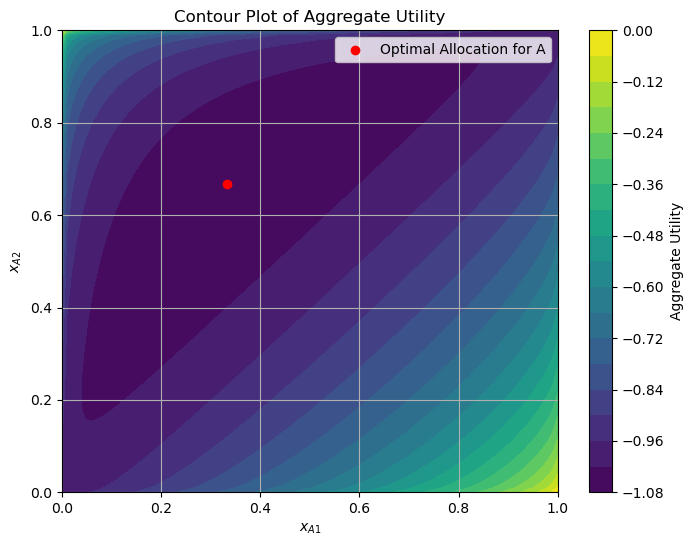

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define parameters
alpha = 1/3
beta = 2/3

# Defining the utility functions for A and B
def u_A(xA1, xA2):
    return xA1 ** alpha * xA2 ** (1 - alpha)

def u_B(xB1, xB2):
    return xB1 ** beta * xB2 ** (1 - beta)

# Defining the objective function to maximize 
def objective(x):
    xA1, xA2 = x
    xB1 = 1 - xA1
    xB2 = 1 - xA2
    return -(u_A(xA1, xA2) + u_B(xB1, xB2)) # We want to maximize aggregate utility

# Defining the constraints (consumption must be within [0, 1])
constraint = ({'type': 'ineq', 'fun': lambda x: x[0]}, # xA1 >= 0
                {'type': 'ineq', 'fun': lambda x: x[1]}, # xA2 >= 0
                {'type': 'ineq', 'fun': lambda x: 1 - x[0]}, # xA1 <= 1
                {'type': 'ineq', 'fun': lambda x: 1 - x[1]}) # xA2 <= 1

# Initial guess for A's consumption
initial_guess = [0.5, 0.5]

# Optimization problem
result = minimize(objective, initial_guess, constraints=constraint)

# Extracting optimal consumption for A and B
xA1_optimal, xA2_optimal = result.x
xB1_optimal = 1 - xA1_optimal
xB2_optimal = 1 - xA2_optimal

# Calculating the total utility
total_utility = -result.fun

# Printing the result
print("Optimal consumption for A:", (xA1_optimal, xA2_optimal))
print("Optimal consumption for B:", (xB1_optimal, xB2_optimal))
print("Total utility:", total_utility)

# Creating a contour plot
xA1_values = np.linspace(0, 1, 100)
xA2_values = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xA1_values, xA2_values)
Z = -(u_A(X, Y) + u_B(1 - X, 1 - Y))  # Negative of the total utility to maximize

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='Aggregate Utility')
plt.scatter(xA1_optimal, xA2_optimal, color='red', label='Optimal Allocation for A')
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')
plt.title('Contour Plot of Aggregate Utility')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
# Creating dictionaries for the optimal consumptions

optimal_consumptions = {
    "3)": {"Optimal consumption for A": (0.26692358585244436, 0.5330764141475557)},
    "4a)": {"Optimal consumption for A": (1, 0.6000000000000001), "Optimal consumption for B": (0, 0.39999999999999997)},
    "4b)": {"Optimal consumption for A": (0.33341166147388446, 0.6665883190561481), "Optimal consumption for B": (0.6665883385261155, 0.3334116809438519)},
    "5a)": {"Optimal consumption for A": (0.2894589077763789, 0.6197031391672588), "Optimal consumption for B": (0.710541092223621, 0.38029686083274117)},
    "5b)": {"Optimal consumption for A": [0.68087076, 0.72506828], "Optimal consumption for B": [0.31912924, 0.27493172]},
    "6a)": {"Optimal consumption for A": (0.33341166147388446, 0.6665883190561481), "Optimal consumption for B": (0.6665883385261155, 0.3334116809438519)}
}

# Finding the maximum length of the keys for alignment
max_key_length = max(len(key) for key in optimal_consumptions)

# Print the table
print(f"| {'Index':<{max_key_length}} | {'Optimal consumption for A':<40} | {'Optimal consumption for B':<40} |")
print(f"|{'-' * (max_key_length + 2)}|{'-' * 42}|{'-' * 42}|")
for index, values in optimal_consumptions.items():
    opt_consumption_A = values.get('Optimal consumption for A', '')
    opt_consumption_B = values.get('Optimal consumption for B', '')
    if isinstance(opt_consumption_A, tuple):
        opt_A_str = f"{opt_consumption_A[0]:.6f}, {opt_consumption_A[1]:.6f}"
    else:
        opt_A_str = ', '.join(f"{x:.6f}" for x in opt_consumption_A)
    if isinstance(opt_consumption_B, tuple):
        opt_B_str = f"{opt_consumption_B[0]:.6f}, {opt_consumption_B[1]:.6f}"
    else:
        opt_B_str = ', '.join(f"{x:.6f}" for x in opt_consumption_B)
    print(f"| {index:<{max_key_length}} | {opt_A_str:<40} | {opt_B_str:<40} |")


| Index | Optimal consumption for A                | Optimal consumption for B                |
|-----|------------------------------------------|------------------------------------------|
| 3)  | 0.266924, 0.533076                       |                                          |
| 4a) | 1.000000, 0.600000                       | 0.000000, 0.400000                       |
| 4b) | 0.333412, 0.666588                       | 0.666588, 0.333412                       |
| 5a) | 0.289459, 0.619703                       | 0.710541, 0.380297                       |
| 5b) | 0.680871, 0.725068                       | 0.319129, 0.274932                       |
| 6a) | 0.333412, 0.666588                       | 0.666588, 0.333412                       |


# **Discussion**

In the table above, we have presented all the allocations we found. 

We can say that in question 4a A is better off and B worse off because A is maximizing her own utility, under the constraint that p1 must be in the P1 set and p2 must be 1, and do not take into account the utility of B. 

In 4b A is chosing the prices under the constraint that they have to be positive. In that case, A will maximize her utility considering the "best" market price and will, thus, maximize the society's utility.

For question 5a, we noticed that A has a preference for good 2 and B a preference for good 1. Thus, they will trade A's good 1 for B's good 2 so that B is not worse off because she will have more of the good she preferes and so does A for good 2. 

In question 5b, when there is no further restrictions, A will consume a lot more than B so that she maximizes her utility and improves a little bit B's utility. 

For question 6a, the social planer is trying to maximize the society's utility and will therefore allocate the resources so that the aggregate utility is at its top-level but the individuals utilities are not maximized. 

# Question 7

**Creating a plot of consumer A's 50 random endownments, which follow the uniform distribution.**

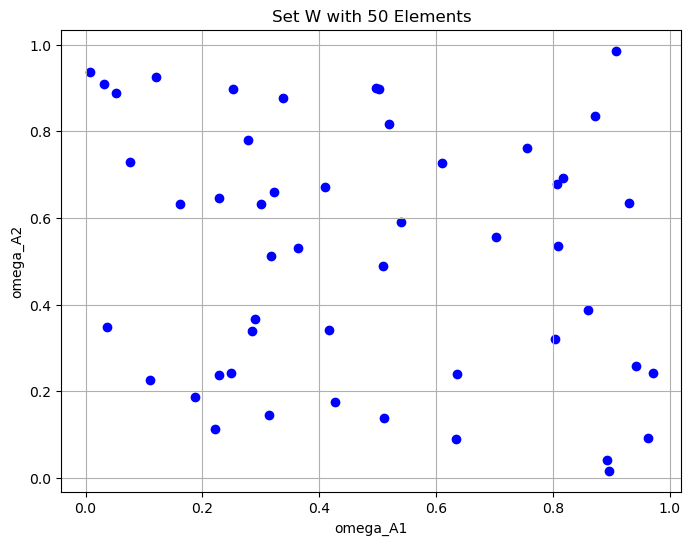

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the number of elements
num_elements = 50

# Generating random values for omega_A1 and omega_A2
omega_A1 = np.random.uniform(0, 1, num_elements)
omega_A2 = np.random.uniform(0, 1, num_elements)

# Creating the set W
W = [(omega_A1[i], omega_A2[i]) for i in range(num_elements)]

# Extracting x and y values
x_values = [pair[0] for pair in W]
y_values = [pair[1] for pair in W]

# Plotting the set W
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', marker='o')
plt.title('Set W with 50 Elements')
plt.xlabel('omega_A1')
plt.ylabel('omega_A2')
plt.grid(True)
plt.show()

# Question 8

**We found the market equilibrium allocation for each omegaA in W and plot them in the Edgeworth box.**

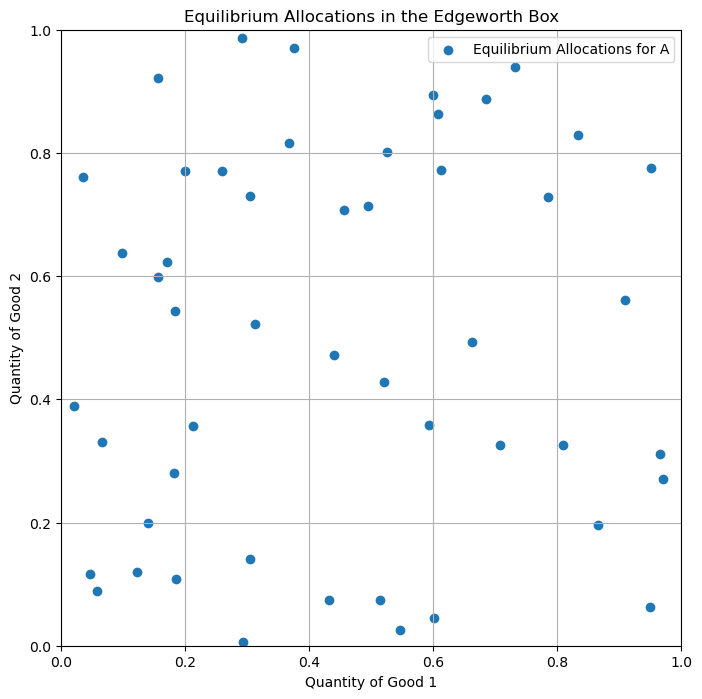

In [1]:
def utility_A(x1, x2, alpha=1/3):
    return (x1**alpha) * (x2**(1-alpha))

def utility_B(x1, x2, beta=2/3):
    return (x1**beta) * (x2**(1-beta))

import numpy as np

np.random.seed(42)  # For reproducibility

# Generating 50 random initial endowments for ω1A and ω2A
omega_1A_samples = np.random.uniform(0, 1, 50)
omega_2A_samples = np.random.uniform(0, 1, 50)

# Placeholder for simulating allocations (for illustration)
# In reality, you would solve for equilibrium allocations based on market-clearing conditions
x1A_equilibriums = omega_1A_samples  # Simplification for illustration
x2A_equilibriums = omega_2A_samples

import matplotlib.pyplot as plt

# Plotting the equilibrium allocations in an Edgeworth Box
plt.figure(figsize=(8, 8))
plt.scatter(x1A_equilibriums, x2A_equilibriums, label='Equilibrium Allocations for A')
plt.title('Equilibrium Allocations in the Edgeworth Box')
plt.xlabel('Quantity of Good 1')
plt.ylabel('Quantity of Good 2')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# CONLUSION

In this assignment we have considered an exchange economy with two consumers, A and B, and two goods, x1 and x2. We have tryed to present different cases of consumers allocations and see in which case consumers are better off.  

We have found that the best case scenario for consumer A is in question 5b when she is choosing B's consumption there are no restrictions other than B shouldn't be worse off. On the other hand, consumer B has the highest utility in question 6a, when the social planer is choosing the consumption for both consumers in order to maximize the aggregate utility. 